In [31]:
import sys
import numpy as np
import scipy as sp
import sklearn
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
%pylab inline
#%matplotlib notebook
#from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.utils.py3compat import annotate
from IPython.display import display
#from ipywidgets import FloatSlider
from ipywidgets import *

Populating the interactive namespace from numpy and matplotlib


C:\Users\Marija\Anaconda2\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['f', 'Text', 'Button', 'random', 'Widget', 'interactive', 'annotate']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [32]:
from InteractiveOptimisationAlgorithms.Functions import *
from InteractiveOptimisationAlgorithms.Matrix import *
from InteractiveOptimisationAlgorithms.Drawing import *
from InteractiveOptimisationAlgorithms.Algorithms import *
from InteractiveOptimisationAlgorithms.Constraints import *

In [33]:
EPSILON = 1E-6
ALPHA = 1
BETA = 0.5
GAMMA = 2
SIGMA = 0.5
PRINT = True

In [34]:
f1 = F1RosenbrockBananaFunction()
elements = np.array([[-1.9, 2]])
point = Matrix(1, 2, elements)
lower_bounds = [-100, -100]
upper_bounds = [100, 100]
implicit_constraint_1 = ImplicitConstraint1()
implicit_constraint_2 = ImplicitConstraint2()

implicit_constraints = [implicit_constraint_1,implicit_constraint_2]

box_algorithm = BoxAlgorithm(f1, lower_bounds, upper_bounds, implicit_constraints, EPSILON, ALPHA, PRINT)
solution_box, logger_box = box_algorithm.run(point)

In [35]:
elements = np.array([[-1, -2]])
point = Matrix(1, 2, elements)
implicit_constraint_1.is_satisfied(point)

False

In [36]:
min_X1 = -2
max_X1 = 3.5
min_X2 = -2
max_X2 = 2
number_of_samples_of_domain = 150

min_X1 = -5
max_X1 = 5
min_X2 = -5
max_X2 = 6
number_of_samples_of_domain = 150

Create fixed arrays for graph

In [37]:
X1_for_graph_before_meshgrid = np.linspace(min_X1, max_X1, number_of_samples_of_domain)
X2_for_graph_before_meshgrid = np.linspace(min_X2, max_X2, number_of_samples_of_domain)

X1_for_graph, X2_for_graph = np.meshgrid(X1_for_graph_before_meshgrid, X2_for_graph_before_meshgrid)
Z_for_graph = []
for x2 in X2_for_graph_before_meshgrid:
    Z = []
    for x1 in X1_for_graph_before_meshgrid:
        elements = np.array([[x1, x2]])
        matrix_x1_x2 = Matrix(1, 2, elements)
        Z.append(f1.valueAt(matrix_x1_x2))
    Z_for_graph.append(Z)

In [38]:
print X1_for_graph

[[-5.         -4.93288591 -4.86577181 ...,  4.86577181  4.93288591  5.        ]
 [-5.         -4.93288591 -4.86577181 ...,  4.86577181  4.93288591  5.        ]
 [-5.         -4.93288591 -4.86577181 ...,  4.86577181  4.93288591  5.        ]
 ..., 
 [-5.         -4.93288591 -4.86577181 ...,  4.86577181  4.93288591  5.        ]
 [-5.         -4.93288591 -4.86577181 ...,  4.86577181  4.93288591  5.        ]
 [-5.         -4.93288591 -4.86577181 ...,  4.86577181  4.93288591  5.        ]]


In [39]:
print X2_for_graph

[[-5.         -5.         -5.         ..., -5.         -5.         -5.        ]
 [-4.9261745  -4.9261745  -4.9261745  ..., -4.9261745  -4.9261745
  -4.9261745 ]
 [-4.85234899 -4.85234899 -4.85234899 ..., -4.85234899 -4.85234899
  -4.85234899]
 ..., 
 [ 5.85234899  5.85234899  5.85234899 ...,  5.85234899  5.85234899
   5.85234899]
 [ 5.9261745   5.9261745   5.9261745  ...,  5.9261745   5.9261745
   5.9261745 ]
 [ 6.          6.          6.         ...,  6.          6.          6.        ]]


Create fixed arrays for data from logger

In [40]:
playMaxOfInterval = 0
X1_from_logger = []
X2_from_logger = []
Z_from_logger = []

for iteration in logger_box.getIterations():
    playMaxOfInterval = playMaxOfInterval + 1
    X1_from_logger.append(iteration.x1Value)
    X2_from_logger.append(iteration.x2Value)
    Z_from_logger.append(iteration.yValue)

Create fixed arrays for constraints

In [41]:
print X1_for_graph_before_meshgrid

[-5.         -4.93288591 -4.86577181 -4.79865772 -4.73154362 -4.66442953
 -4.59731544 -4.53020134 -4.46308725 -4.39597315 -4.32885906 -4.26174497
 -4.19463087 -4.12751678 -4.06040268 -3.99328859 -3.9261745  -3.8590604
 -3.79194631 -3.72483221 -3.65771812 -3.59060403 -3.52348993 -3.45637584
 -3.38926174 -3.32214765 -3.25503356 -3.18791946 -3.12080537 -3.05369128
 -2.98657718 -2.91946309 -2.85234899 -2.7852349  -2.71812081 -2.65100671
 -2.58389262 -2.51677852 -2.44966443 -2.38255034 -2.31543624 -2.24832215
 -2.18120805 -2.11409396 -2.04697987 -1.97986577 -1.91275168 -1.84563758
 -1.77852349 -1.7114094  -1.6442953  -1.57718121 -1.51006711 -1.44295302
 -1.37583893 -1.30872483 -1.24161074 -1.17449664 -1.10738255 -1.04026846
 -0.97315436 -0.90604027 -0.83892617 -0.77181208 -0.70469799 -0.63758389
 -0.5704698  -0.5033557  -0.43624161 -0.36912752 -0.30201342 -0.23489933
 -0.16778523 -0.10067114 -0.03355705  0.03355705  0.10067114  0.16778523
  0.23489933  0.30201342  0.36912752  0.43624161  0.

In [42]:
#Find points which DO NOT satisfy the constraints
constraints = logger_box.getConstraints()
data_of_constraints = []

for constraint in constraints:
    
    #elements = np.array([[0,0]])
    #matrix_x1_x2 = Matrix(1, 2, elements)
    #print constraint.value_at(matrix_x1_x2)
                         
    data_of_current_constraint = []
    #X1_of_constraint_before_meshgrid = []
    #X2_of_constraint_before_meshgrid = []
    Z_of_constraint = []
    X1_of_constraint = []
    X2_of_constraint = []
    for x2 in X2_for_graph_before_meshgrid:
        Z = []
        X1_of_constraint_before_meshgrid = []
        X2_of_constraint_before_meshgrid = []
        #print constraint.value_at(matrix_x1_x2)
        for x1 in X1_for_graph_before_meshgrid:
            elements = np.array([[x1, x2]])
            matrix_x1_x2 = Matrix(1, 2, elements)
            print "JEDAN"
            print constraint.value_at(matrix_x1_x2)
            if (constraint.is_satisfied(matrix_x1_x2) is True):
                Z.append(np.nan)
                print "IF"
                print constraint.value_at(matrix_x1_x2)
            else:
                print "else"
                Z.append(constraint.value_at(matrix_x1_x2))
                print constraint.value_at(matrix_x1_x2)
            print "DVA"
            print constraint.value_at(matrix_x1_x2)
            print "\n"
        Z_of_constraint.append(Z)
    #print Z_of_constraint
    #X1_of_constraint, X2_of_constraint = np.meshgrid(X1_of_constraint_before_meshgrid, X2_of_constraint_before_meshgrid)
    X1_of_constraint, X2_of_constraint = np.meshgrid(X1_for_graph_before_meshgrid, X2_for_graph_before_meshgrid)
    data_of_current_constraint.append(X1_of_constraint)
    data_of_current_constraint.append(X2_of_constraint)
    data_of_current_constraint.append(Z_of_constraint)
    
    data_of_constraints.append(data_of_current_constraint)

JEDAN
0.0
IF
0.0
DVA
0.0


JEDAN
-0.0671140939597
else
-0.0671140939597
DVA
-0.0671140939597


JEDAN
-0.134228187919
else
-0.134228187919
DVA
-0.134228187919


JEDAN
-0.201342281879
else
-0.201342281879
DVA
-0.201342281879


JEDAN
-0.268456375839
else
-0.268456375839
DVA
-0.268456375839


JEDAN
-0.335570469799
else
-0.335570469799
DVA
-0.335570469799


JEDAN
-0.402684563758
else
-0.402684563758
DVA
-0.402684563758


JEDAN
-0.469798657718
else
-0.469798657718
DVA
-0.469798657718


JEDAN
-0.536912751678
else
-0.536912751678
DVA
-0.536912751678


JEDAN
-0.604026845638
else
-0.604026845638
DVA
-0.604026845638


JEDAN
-0.671140939597
else
-0.671140939597
DVA
-0.671140939597


JEDAN
-0.738255033557
else
-0.738255033557
DVA
-0.738255033557


JEDAN
-0.805369127517
else
-0.805369127517
DVA
-0.805369127517


JEDAN
-0.872483221477
else
-0.872483221477
DVA
-0.872483221477


JEDAN
-0.939597315436
else
-0.939597315436
DVA
-0.939597315436


JEDAN
-1.0067114094
else
-1.0067114094
DVA
-1.0067114094


J

In [43]:
elements = np.array([[-1.95959596,-2]])
matrix_x1_x2 = Matrix(1, 2, elements)
print constraints[1].value_at(matrix_x1_x2)
#print data_of_constraints[0][0]

3.95959596


In [44]:
print X2_for_graph_before_meshgrid
#print data_of_constraints[0][0]
#print data_of_constraints[0][1]

[-5.         -4.9261745  -4.85234899 -4.77852349 -4.70469799 -4.63087248
 -4.55704698 -4.48322148 -4.40939597 -4.33557047 -4.26174497 -4.18791946
 -4.11409396 -4.04026846 -3.96644295 -3.89261745 -3.81879195 -3.74496644
 -3.67114094 -3.59731544 -3.52348993 -3.44966443 -3.37583893 -3.30201342
 -3.22818792 -3.15436242 -3.08053691 -3.00671141 -2.93288591 -2.8590604
 -2.7852349  -2.7114094  -2.63758389 -2.56375839 -2.48993289 -2.41610738
 -2.34228188 -2.26845638 -2.19463087 -2.12080537 -2.04697987 -1.97315436
 -1.89932886 -1.82550336 -1.75167785 -1.67785235 -1.60402685 -1.53020134
 -1.45637584 -1.38255034 -1.30872483 -1.23489933 -1.16107383 -1.08724832
 -1.01342282 -0.93959732 -0.86577181 -0.79194631 -0.71812081 -0.6442953
 -0.5704698  -0.4966443  -0.42281879 -0.34899329 -0.27516779 -0.20134228
 -0.12751678 -0.05369128  0.02013423  0.09395973  0.16778523  0.24161074
  0.31543624  0.38926174  0.46308725  0.53691275  0.61073826  0.68456376
  0.75838926  0.83221477  0.90604027  0.97986577  1.0

In [45]:
print data_of_constraints[0][1]

[[-5.         -5.         -5.         ..., -5.         -5.         -5.        ]
 [-4.9261745  -4.9261745  -4.9261745  ..., -4.9261745  -4.9261745
  -4.9261745 ]
 [-4.85234899 -4.85234899 -4.85234899 ..., -4.85234899 -4.85234899
  -4.85234899]
 ..., 
 [ 5.85234899  5.85234899  5.85234899 ...,  5.85234899  5.85234899
   5.85234899]
 [ 5.9261745   5.9261745   5.9261745  ...,  5.9261745   5.9261745
   5.9261745 ]
 [ 6.          6.          6.         ...,  6.          6.          6.        ]]


In [46]:
#print data_of_constraints[0][2]

Create and link widgets

In [47]:
w = widgets.IntSlider(min=0, max=playMaxOfInterval - 1, step=1, value=0)
play = widgets.Play(
    value=0,
    min=0,
    max=playMaxOfInterval,
    step=1,
    description="Press play",
    disabled=False
)
nextButton = widgets.Button(description="Next")
previousButton = widgets.Button(description="Previous")

def on_nextButton_clicked(x):
    if (play.value < play.max):
        play.value += 1

def on_previousButton_clicked(x):
    if (play.value > 0):
        play.value -= 1

nextButton.on_click(on_nextButton_clicked)
previousButton.on_click(on_previousButton_clicked)
widgets.jslink((play, 'value'), (w, 'value'))

Define function for drawing the whole graph and a single point from the logger

In [48]:
def f(iteration_number, cmap, show_colour, show_constraints):
    plt.clf()
    plt.close('all')
    plt.figure(iteration_number)
    #ax = plt.axes(projection='3d')
    contours = plt.contour(X1_for_graph, X2_for_graph, Z_for_graph, 3, colors='black')

    #region Plot fixed graph
    if(show_colour):
        plt.clabel(contours, inline=True, fontsize=8)
        #plt.imshow(Z, extent=[0, 5, 0, 5], origin='lower', cmap=cmap, alpha=0.5)
        plt.imshow(Z_for_graph, extent=[min_X1, max_X1, min_X2, max_X2], origin='lower', cmap='Greens', alpha=0.5)
        plt.colorbar();
    #endregion

    # region Plot constraints
    if(show_constraints):
        plt.clabel(contours, inline=True, fontsize=8)
        plt.imshow(Z_for_graph, extent=[min_X1, max_X1, min_X2, max_X2], origin='lower', cmap='Reds', alpha=0.5)
        plt.colorbar();

    # endregion

    #region Plot single point depending on the iteration
    contours.plot([X1_from_logger[iteration_number]], [X2_from_logger[iteration_number]], [Z_from_logger[iteration_number]], markerfacecolor='k', markeredgecolor='k', marker='o', markersize=5, alpha=1)
    #ax.scatter(X1_from_logger, X2_from_logger, Z_from_logger, c='g', marker='^')
    #endregion

    plt.show()

In [49]:
def plot_constraints():
    checkboxes = []
    
    def plot_this_constraint():
        raise NotImplementedError
    
    #for each constraint
    '''
    for i in range(len(constraints)):
        
        #create and display a checkbox for it
        checkbox_description = 'Constraint ' + str(i)
        checkboxes.append( widgets.Checkbox(value=False, description=checkbox_description, disabled=False) )
        chechboxes[i].on_click(plot_this_constraint(i))
        display(checkboxes[i])
        
        
        #find its data
        X1_of_constraint = data_of_constraints[i][0]
        X2_of_constraint = data_of_constraints[i][1]
        Z_of_constraint = data_of_constraints[i][2]
    '''
    X1_of_constraint = data_of_constraints[0][0]
    X2_of_constraint = data_of_constraints[0][1]
    Z_of_constraint = data_of_constraints[0][2]
        
        #plot its data
    #plt.imshow(Z_of_constraint, extent=[min_X1, max_X1, min_X2, max_X2], origin='lower', cmap='Reds', alpha=0.5)
    #plt.contourf(X1_of_constraint, X2_of_constraint, Z_of_constraint, 20, cmap='RdGy', alpha = 1)
    plt.contourf(X1_of_constraint, X2_of_constraint, Z_of_constraint, 20, cmap='cool', alpha = 0.5)
    plt.colorbar();

In [50]:
def f2(iteration_number, cmap, show_colour, show_constraints):
    plt.clf()
    plt.close('all')
    plt.figure(iteration_number)
    plt.axis([min_X1, max_X1, min_X2, max_X2])
    ax = plt.gca()
    ax.set_autoscale_on(False)
    
    #plt.contourf(poljeX, poljeY, poljeZ, 20, cmap='RdGy')
    #plt.contourf(X1_for_graph, X2_for_graph, Z_for_graph, 20, cmap='RdGy')
    plt.contour(X1_for_graph, X2_for_graph, Z_for_graph, 3, colors='black')
    #plt.colorbar();
    if(show_colour):
        #plt.clabel(contours, inline=True, fontsize=8)
        #plt.clabel(ax, inline=True, fontsize=8)
        #plt.imshow(Z, extent=[0, 5, 0, 5], origin='lower', cmap=cmap, alpha=0.5)
        plt.imshow(Z_for_graph, extent=[min_X1, max_X1, min_X2, max_X2], origin='lower', cmap='Greens', alpha=0.5)
        #plt.imshow(Z_for_graph, extent=[min_X1, max_X1, min_X2, max_X2], origin='lower', cmap=cmap, alpha=0.5)
        plt.colorbar();
    
    if(show_constraints):
        #plt.clabel(contours, inline=True, fontsize=8)
        '''
        plt.imshow(Z_for_graph, extent=[min_X1, max_X1, min_X2, max_X2], origin='lower', cmap='Reds', alpha=0.5)
        plt.colorbar();
        '''
        plot_constraints()

    #plt.plot(X, Y, 'b')
    #plt.plot(poljeX[iteration], poljeY[iteration], 'bo')
    plt.plot(X1_from_logger[iteration_number], X2_from_logger[iteration_number], 'go')
    plt.show()

Define cmap choices

In [51]:
cmap_choices = {
            'RdGy': 'RdGy',
            'PiYG': 'PiYG',
            'hsv': 'hsv'}

Call the function interactively, and display remaining widgets

In [52]:
interact(f2, iteration_number=w, cmap = cmap_choices, show_colour = True, show_constraints = True)

display(play)
display(previousButton)
display(nextButton)

In [53]:
#https://stackoverflow.com/questions/33371083/ipywidgets-how-to-update-plot-with-multiple-series-based-on-checkbox-selection
from ipywidgets import Checkbox, interactive
from IPython.display import display

l = ["Dog", "Cat", "Mouse"]
chk = [Checkbox(description=a) for a in l]

def updatePlot(**kwargs):
    print [(k,v) for k, v in kwargs.iteritems()]

interact(updatePlot, **{c.description: c.value for c in chk})

<function __main__.updatePlot>

In [54]:
X1 = []
X2 = []
Z = []
for i in range(len(constraints)):
    #find its data
    X1_of_constraint = data_of_constraints[i][0]
    X1.append(X1_of_constraint)
    X2_of_constraint = data_of_constraints[i][1]
    X2.append(X2_of_constraint)
    Z_of_constraint = data_of_constraints[i][2]
    Z.append(Z_of_constraint)

In [55]:
print "X1:\n"
for element in X1:
    print element
    print "\n"
print "X2:\n"    
for element in X2:
    print element
    print "\n"

X1:

[[-5.         -4.93288591 -4.86577181 ...,  4.86577181  4.93288591  5.        ]
 [-5.         -4.93288591 -4.86577181 ...,  4.86577181  4.93288591  5.        ]
 [-5.         -4.93288591 -4.86577181 ...,  4.86577181  4.93288591  5.        ]
 ..., 
 [-5.         -4.93288591 -4.86577181 ...,  4.86577181  4.93288591  5.        ]
 [-5.         -4.93288591 -4.86577181 ...,  4.86577181  4.93288591  5.        ]
 [-5.         -4.93288591 -4.86577181 ...,  4.86577181  4.93288591  5.        ]]


[[-5.         -4.93288591 -4.86577181 ...,  4.86577181  4.93288591  5.        ]
 [-5.         -4.93288591 -4.86577181 ...,  4.86577181  4.93288591  5.        ]
 [-5.         -4.93288591 -4.86577181 ...,  4.86577181  4.93288591  5.        ]
 ..., 
 [-5.         -4.93288591 -4.86577181 ...,  4.86577181  4.93288591  5.        ]
 [-5.         -4.93288591 -4.86577181 ...,  4.86577181  4.93288591  5.        ]
 [-5.         -4.93288591 -4.86577181 ...,  4.86577181  4.93288591  5.        ]]


X2:

[[-5.     

In [56]:
print "Z:\n"    
for element in Z:
    print element
    print "\n\n\n\n\n\n"

Z:

[[nan, -0.067114093959731669, -0.13422818791946334, -0.20134228187919501, -0.26845637583892579, -0.33557046979865746, -0.40268456375838912, -0.46979865771812079, -0.53691275167785246, -0.60402684563758413, -0.6711409395973158, -0.73825503355704747, -0.80536912751677825, -0.87248322147650992, -0.93959731543624159, -1.0067114093959733, -1.0738255033557049, -1.1409395973154361, -1.2080536912751678, -1.275167785234899, -1.3422818791946307, -1.4093959731543624, -1.476510067114094, -1.5436241610738257, -1.6107382550335569, -1.6778523489932886, -1.7449664429530198, -1.8120805369127515, -1.8791946308724832, -1.9463087248322148, -2.0134228187919465, -2.0805369127516777, -2.1476510067114094, -2.2147651006711411, -2.2818791946308723, -2.348993288590604, -2.4161073825503356, -2.4832214765100673, -2.5503355704697985, -2.6174496644295302, -2.6845637583892619, -2.7516778523489931, -2.8187919463087248, -2.8859060402684564, -2.9530201342281881, -3.0201342281879193, -3.087248322147651, -3.1543624161

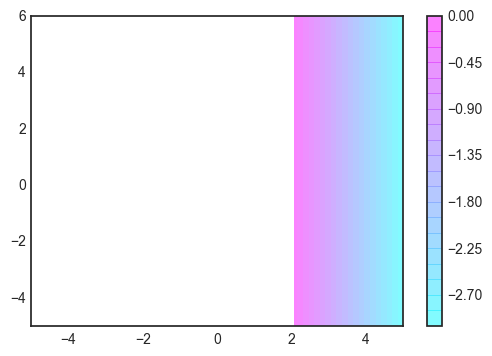

In [57]:
plt.contourf(X1[1], X2[1], Z[1], 20, cmap='cool', alpha = 0.5)
plt.colorbar();

In [75]:
w2 = widgets.IntSlider(min=0, max=playMaxOfInterval - 1, step=1, value=0)
play2 = widgets.Play(
    value=0,
    min=0,
    max=playMaxOfInterval,
    step=1,
    description="Press play",
    disabled=False
)
nextButton2 = widgets.Button(description="Next")
previousButton2 = widgets.Button(description="Previous")

def on_nextButton_clicked(x):
    if (play.value < play.max):
        play.value += 1

def on_previousButton_clicked(x):
    if (play.value > 0):
        play.value -= 1

nextButton2.on_click(on_nextButton_clicked)
previousButton2.on_click(on_previousButton_clicked)
widgets.jslink((play2, 'value'), (w2, 'value'))

In [76]:
constraint_cmap_choices = {
            'cool': 'cool',
            'copper': 'copper',
            #'winter': 'winter',
            'autumn': 'autumn',
            #'viridis': 'viridis'
}

In [87]:
graph_cmap_choices = {
            #'viridis': 'viridis',
            'Greens': 'Greens',
            'GnBu': 'GnBu'}

In [88]:
def plot_constraints(cmap):
    checkboxes = []
    
    def plot_this_constraint():
        raise NotImplementedError
        
    alpha_value = 1. / len(constraints)
    
    #for each constraint
    for i in range(len(constraints)):
        '''        
        #create and display a checkbox for it
        checkbox_description = 'Constraint ' + str(i)
        checkboxes.append( widgets.Checkbox(value=True, description=checkbox_description, disabled=False) )
        chechboxes[i].on_click(plot_this_constraint(i))
        display(checkboxes[i])
        '''   
        #find its data
        X1_of_constraint = data_of_constraints[i][0]
        X2_of_constraint = data_of_constraints[i][1]
        Z_of_constraint = data_of_constraints[i][2]
    
    #X1_of_constraint = data_of_constraints[0][0]
    #X2_of_constraint = data_of_constraints[0][1]
    #Z_of_constraint = data_of_constraints[0][2]
        
        #plot its data
    #plt.imshow(Z_of_constraint, extent=[min_X1, max_X1, min_X2, max_X2], origin='lower', cmap='Reds', alpha=0.5)
    #plt.contourf(X1_of_constraint, X2_of_constraint, Z_of_constraint, 20, cmap='RdGy', alpha = 1)
        plt.contourf(X1_of_constraint, X2_of_constraint, Z_of_constraint, 20, cmap=cmap, alpha = alpha_value)
        plt.colorbar();


In [89]:
def f3(iteration_number, graph_cmap, constraints_cmap, show_colour, show_constraints):
#def f3(iteration_number, graph_cmap, constraints_cmap, show_colour, show_constraints, **kwargs):
    plt.clf()
    plt.close('all')
    plt.figure(iteration_number)
    plt.axis([min_X1, max_X1, min_X2, max_X2])
    ax = plt.gca()
    ax.set_autoscale_on(False)
    
    #plt.contourf(poljeX, poljeY, poljeZ, 20, cmap='RdGy')
    #plt.contourf(X1_for_graph, X2_for_graph, Z_for_graph, 20, cmap='RdGy')
    plt.contour(X1_for_graph, X2_for_graph, Z_for_graph, 3, colors='black')
    #plt.colorbar();
    if(show_colour):
        #plt.clabel(contours, inline=True, fontsize=8)
        #plt.clabel(ax, inline=True, fontsize=8)
        #plt.imshow(Z, extent=[0, 5, 0, 5], origin='lower', cmap=cmap, alpha=0.5)
        #plt.imshow(Z_for_graph, extent=[min_X1, max_X1, min_X2, max_X2], origin='lower', cmap='Greens', alpha=1)
        #plt.imshow(Z_for_graph, extent=[min_X1, max_X1, min_X2, max_X2], origin='lower', cmap=cmap, alpha=0.5)
        plt.imshow(Z_for_graph, extent=[min_X1, max_X1, min_X2, max_X2], origin='lower', cmap=graph_cmap, alpha=1)
        plt.colorbar();
    
    if(show_constraints):
        #plt.clabel(contours, inline=True, fontsize=8)
        '''
        plt.imshow(Z_for_graph, extent=[min_X1, max_X1, min_X2, max_X2], origin='lower', cmap='Reds', alpha=0.5)
        plt.colorbar();
        '''
        plot_constraints(constraints_cmap)
        #for 

    #plt.plot(X, Y, 'b')
    #plt.plot(poljeX[iteration], poljeY[iteration], 'bo')
    plt.plot(X1_from_logger[iteration_number], X2_from_logger[iteration_number], 'go')
    plt.show()

In [90]:
interact(f3, iteration_number=w2, graph_cmap = graph_cmap_choices, constraints_cmap = constraint_cmap_choices, show_colour = True, show_constraints = True)
#interact(f3, iteration_number=w2, graph_cmap = graph_cmap_choices, constraints_cmap = constraint_cmap_choices, show_colour = True, show_constraints = True, **{c.description: c.value for c in chk})

display(play2)
display(previousButton2)
display(nextButton2)

In [104]:
w3 = widgets.IntSlider(min=0, max=playMaxOfInterval - 1, step=1, value=0)
play3 = widgets.Play(
    value=0,
    min=0,
    max=playMaxOfInterval,
    step=1,
    description="Press play",
    disabled=False
)
nextButton3 = widgets.Button(description="Next")
previousButton3 = widgets.Button(description="Previous")

def on_nextButton_clicked(x):
    if (play.value < play.max):
        play.value += 1

def on_previousButton_clicked(x):
    if (play.value > 0):
        play.value -= 1

nextButton3.on_click(on_nextButton_clicked)
previousButton3.on_click(on_previousButton_clicked)
widgets.jslink((play3, 'value'), (w3, 'value'))

In [105]:
from ipywidgets import Checkbox, interactive
from IPython.display import display

l = ["Dog", "Cat", "Mouse"]
chk = [Checkbox(description=a) for a in l]

def updatePlot(**kwargs):
    for k, v in kwargs.iteritems():
        if v:
            print k

interact(updatePlot, **{c.description: c.value for c in chk})

<function __main__.updatePlot>

In [106]:
print chk[0].keys 

['_view_name', '_dom_classes', 'description', 'msg_throttle', '_model_name', '_view_module', '_model_module_version', 'value', 'disabled', '_view_module_version', 'layout', '_model_module']


In [107]:
checkboxes = []
for i in range(len(constraints)):    
    #create a checkbox for it
    checkbox_description = 'Constraint ' + str(i+1)
    checkbox = widgets.Checkbox(value=True, description=checkbox_description, disabled=False)
    checkboxes.append(checkbox)
    display(checkbox)

In [108]:
alpha_value = 1. / len(constraints)

In [109]:
def plot_this_constraint(constraint_index, constraints_cmap):
    X1_of_constraint = data_of_constraints[constraint_index][0]
    X2_of_constraint = data_of_constraints[constraint_index][1]
    Z_of_constraint = data_of_constraints[constraint_index][2]
    plt.contourf(X1_of_constraint, X2_of_constraint, Z_of_constraint, 20, cmap=constraints_cmap, alpha = alpha_value)
    plt.colorbar();

In [110]:
#def f3(iteration_number, graph_cmap, constraints_cmap, show_colour, show_constraints):
def f4(iteration_number, graph_cmap, constraints_cmap, show_colour, show_constraints, **kwargs):
    plt.clf()
    plt.close('all')
    plt.figure(iteration_number)
    plt.axis([min_X1, max_X1, min_X2, max_X2])
    ax = plt.gca()
    ax.set_autoscale_on(False)
    
    #plt.contourf(poljeX, poljeY, poljeZ, 20, cmap='RdGy')
    #plt.contourf(X1_for_graph, X2_for_graph, Z_for_graph, 20, cmap='RdGy')
    plt.contour(X1_for_graph, X2_for_graph, Z_for_graph, 3, colors='black')
    #plt.colorbar();
    if(show_colour):
        #plt.clabel(contours, inline=True, fontsize=8)
        #plt.clabel(ax, inline=True, fontsize=8)
        #plt.imshow(Z, extent=[0, 5, 0, 5], origin='lower', cmap=cmap, alpha=0.5)
        #plt.imshow(Z_for_graph, extent=[min_X1, max_X1, min_X2, max_X2], origin='lower', cmap='Greens', alpha=1)
        #plt.imshow(Z_for_graph, extent=[min_X1, max_X1, min_X2, max_X2], origin='lower', cmap=cmap, alpha=0.5)
        plt.imshow(Z_for_graph, extent=[min_X1, max_X1, min_X2, max_X2], origin='lower', cmap=graph_cmap, alpha=1)
        plt.colorbar();
    
    if(show_constraints):
        #plt.clabel(contours, inline=True, fontsize=8)
        '''
        plt.imshow(Z_for_graph, extent=[min_X1, max_X1, min_X2, max_X2], origin='lower', cmap='Reds', alpha=0.5)
        plt.colorbar();
        '''
        #plot_constraints(constraints_cmap)
        for key, value in kwargs.iteritems():
            if value:
                constraint_index = int(key.split()[1]) - 1
                plot_this_constraint(constraint_index, constraints_cmap)

    #plt.plot(X, Y, 'b')
    #plt.plot(poljeX[iteration], poljeY[iteration], 'bo')
    plt.plot(X1_from_logger[iteration_number], X2_from_logger[iteration_number], 'go')
    plt.show()

In [111]:
#interact(f3, iteration_number=w2, graph_cmap = graph_cmap_choices, constraints_cmap = constraint_cmap_choices, show_colour = True, show_constraints = True)
interact(f4, iteration_number=w3, graph_cmap = graph_cmap_choices, constraints_cmap = constraint_cmap_choices, show_colour = True, show_constraints = True, **{c.description: c.value for c in checkboxes})

display(play3)
display(previousButton3)
display(nextButton3)